In [1]:
import os
import sys
sys.path.append('..')

from scripts.core.text import remove_punctuation

from scripts.data_loaders.common import show_sample
from scripts.data_loaders.L2ARCTIC import L2ArcticDataset, all_arctic_speaker_splits

from scripts.asr.whisper import whisper_transcribe_from_array
from scripts.asr.azure_speech import azure_transcribe_from_array
from scripts.asr.google_speech import google_transcribe_from_array
from scripts.asr.salad import salad_transcribe_from_array
from scripts.asr.owsm import owsm_transcribe_from_array

from scripts.eval.metrics import wer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import clear_output
clear_output()

In [2]:
suitcase = L2ArcticDataset(split='suitcase_corpus', include_speaker_info=True, include_text=True)

IPA: jɛˈsʌˈmɪˈtsiˈmzɪffɹʌˈmðʌfɝˈsbɪˈktʃɝzzɪsɪzlaɪˈkʌbɪˈktʃɝoʊfʌˈmʌdaʊˈntaʊˈnɔfʌsiˈtiwɪˈzʌbɪˈkhɔtɛˈlsʌndtuˈtuˈbiˈpʌlwʌˈnwʊˈmʌnæˈndwʌˈnmæˈnwɛˈnduˈzɪˈshətɛˈlzʌnbɪkʌzzɛˈɹɪˈznoʊsɔɪnʌˈɔˈnzʌɔˈnzʌwɛˈndoʊzɪtʃwʌˈnlaɪˈkɹæˈʒdɪˈntuɪtʃʌˈðɝsʌndɑftɝðæˈtɑftɝkɹæˈʃʌˈðeɪˈfɑnðæˈtsɝbɹaɪˈzɪŋɡɹlizɛhæˈvdʌsɛmkɑˈlɝoʊvzʌbæˈkʌndɪhɪllaɪˈkɪˈtsɪssɪˈmʌlɝbæˈksæˈkʃʌliʌndɑftɹkɹæˈʃɪŋɡɪvɹiwʌˌndoʊˈkzɛiˈtʃʌˈdɹzbæˈkʌndɑftɝðæˈtwɛˈnwɛˈntbæˈktuˈðɛɹɹuˈmzðɛfaʊˈnðæˈtzʌˈmæˈndoʊˈkzʌˈdɹɛˈsɔvzʌˈɑftɝhɪˈzoʊbʌnɪŋtszʌˈzʌˈbæˈkhɪzbæˈkhiˈfʌnzʌthiˈtɔˈkʌˈhiˈfaʊˈndlaɪˈkʌɹɛˈddɹɛˈsɔfʌwʊˈmʌnʌnzʌwʊˈmʌnfɑnzʌtʌˈeɪˈjɪloʊtɔɪʌˈvðʌmæˈnʌndʌmnɑˈtʃʊˈɹwʌˈtswʌˈthæˈbʌnæˈftɝθæˈθ
Metadata: {'gender': 'M', 'native-language': 'Arabic'} yes um it seems that from the first pictures this is like a picture of um a downtown of a city with a big hotels and two two people one woman and one man went to this hotels and because there is no sign uh on the on the windows each one like crashed into each others and after that after crash uh they found that surprisingly they have

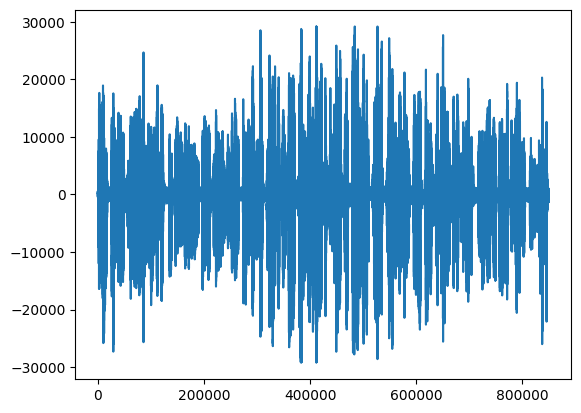

In [3]:
show_sample(suitcase[0])

In [4]:
predicted = owsm_transcribe_from_array(suitcase[0][1])
print(f"Predicted: {predicted}")
print(f"Reference: {suitcase[0][3]}")
error = wer(remove_punctuation(predicted), suitcase[0][3])
print(f"Error: {error}")

Using naive long-form decoding


/Users/alex/Desktop/CS/Startups/Koel/ML/venv/lib/python3.8/site-packages/espnet2/s2t/espnet_model.py:279: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(False):


Predicted: yes um it seems that from the first pictures this is like a picture of um a downtown of a city with a big hotels and two two people one woman and one man went to these hotels and because there is no sign uh on the on the windows each one like crashed into each other's and after that after crash uh they found that surprisingly they have the same color of the bag and it it like it's it's similar bags actually and after crashing everyone took the each other's bag and after that when went back to their rooms they found that the man took the dress of the after his opening the the bag his bag he found that he took uh he found like a red dress of a woman and the woman found that uh a ulu tie of the man and i'm not sure what so will happen after that
Reference: yes um it seems that from the first pictures this is like a picture of um a downtown of a city with a big hotels and two two people one woman and one man went to this hotels and because there is no sign uh on the on the windo

In [ ]:
segments, info = whisper_transcribe_from_array(suitcase[0][1])
predicted = ' '.join([segment.text for segment in segments])
print(f"Predicted: {predicted}")
print(f"Reference: {suitcase[0][3]}")
error = wer(predicted, suitcase[0][3])
print(f"Error: {error}")

Predicted:  yes it seems from the first pictures this is like a picture of a town of a city with a big  hotels and two two people one woman and one man went to these hotels and because there is no sign  on the on the windows each one like crashed into each others and after that after crash  they found that surprisingly they have the same color of the bag and like it's similar bags  actually and after crashing everyone took each other's bag and after that when went back to  their rooms they found that the man took the dress of the after his opening the bag his bag he found  that he took he found like a red dress of a woman and the woman found that a yellow tie of the man  and i'm not sure what's what happened after that
Reference: yes um it seems that from the first pictures this is like a picture of um a downtown of a city with a big hotels and two two people one woman and one man went to this hotels and because there is no sign uh on the on the windows each one like crashed into each 

In [ ]:
predicted = ' '.join(result.alternatives[0].transcript for result in google_transcribe_from_array(suitcase[0][1]).results)
print(f"Predicted: {predicted}")
print(f"Reference: {suitcase[0][3]}")
error = wer(predicted, suitcase[0][3])
print(f"Error: {error}")

Predicted: yes it seems that from the first pictures this is like a picture of a downtown of a city with a big hotels and two two people one woman and one man went to this hotel and because there is no sign on the Windows each one like crashed into each other's and after that after crash they found that surprisingly they have the same color of the bag and like it's similar bags actually and after crashing everyone took the each other's back and
Reference: yes um it seems that from the first pictures this is like a picture of um a downtown of a city with a big hotels and two two people one woman and one man went to this hotels and because there is no sign uh on the on the windows each one like crashed into each others and after that after crash uh they found that surprisingly they have the same color of the bag and i feel like it's it's similar bags actually and after crashing everyone took the each other's bag and after that when went back to their rooms they found that the man took th

In [ ]:
predicted = azure_transcribe_from_array(suitcase[0][1])
predicted = ' '.join(predicted)
print(f"Predicted: {predicted}")
print(f"Reference: {suitcase[0][3]}")
error = wer(predicted.lower().replace('.', '').replace(',', ''), suitcase[0][3])
print(f"Error: {error}")

Predicted: Yes, it seems that from the first pictures, this is like a picture of a downtown of a city with a big hotels and two two people, one woman and one man went to this hotels. And because there is no sign on the on the windows, each one like crashed into each others. And after that after crash, they found that surprisingly they have the same color of the bag and like it's it's similar bags actually. And after crashing, everyone took each others bag. And after that we went back to their rooms. They found that the man took the dress of the after his opening the bag, his bag he found that he took, he found like a red dress of a woman. And the woman found that a yellow tie of the man. And I'm not sure what's what happened after that.
Reference: yes um it seems that from the first pictures this is like a picture of um a downtown of a city with a big hotels and two two people one woman and one man went to this hotels and because there is no sign uh on the on the windows each one like 

In [ ]:
predicted = salad_transcribe_from_array(suitcase[0][1])['text']
clear_output()
print(f"Predicted: {predicted}")
print(f"Reference: {suitcase[0][3]}")
error = wer(predicted, suitcase[0][3])
print(f"Error: {error}")

Predicted:  yes it seems from the first pictures this is like a picture of a downtown of a city with a big hotels and two people one woman and one man went to this hotels and because there is no sign on the on the windows each one like crashed into each others and after that after crash they found that surprisingly they have the same color of the bag and like it's similar bags actually and after crashing everyone took each other's bag and after that when went back to their rooms they found that the man took the dress of the after his opening the bag his bag he found that he took he found like a red dress of a woman and the woman found that a yellow tie of the man and I'm not what's what happened after that
Reference: yes um it seems that from the first pictures this is like a picture of um a downtown of a city with a big hotels and two two people one woman and one man went to this hotels and because there is no sign uh on the on the windows each one like crashed into each others and af

In [4]:
RESULT_CSV = '../.data/asr_scores.csv'
columns = [
    'native_language', 
    'text_groundtruth', 
    'text_whisper',
    'text_google',
    'text_azure',
    'text_salad',
    'text_owsm',
    'wer_whisper',
    'wer_google',
    'wer_azure',
    'wer_salad',
    'wer_owsm',
]

if os.path.exists(RESULT_CSV):
    results = pd.read_csv(RESULT_CSV)
    for col in columns:
        if col not in results.columns:
            results[col] = np.nan
    results = results[columns]
else:
    results = pd.DataFrame(columns=columns)

for i, sample in enumerate(suitcase):
    _, audio, speaker_info, text_groundtruth = sample
    native_language = speaker_info['native-language']

    if i < len(results) and not pd.isna(results['text_whisper'][i]):
        text_whisper = results['text_whisper'][i]
    else:
        try:
            segments, _ = whisper_transcribe_from_array(audio)
            text_whisper = ' '.join(segment.text for segment in segments)
        except Exception as e:
            print(f"Whisper error {i}: {e}")
            text_whisper = None

    if i < len(results) and not pd.isna(results['text_azure'][i]):
        text_azure = results['text_azure'][i]
    else:
        try:
            text_azure = ' '.join(azure_transcribe_from_array(audio))
        except Exception as e:
            print(f"Azure error {i}: {e}")
            text_azure = None

    if i < len(results) and not pd.isna(results['text_google'][i]):
        text_google = results['text_google'][i]
    else:
        try:
            text_google = ' '.join(result.alternatives[0].transcript for result in google_transcribe_from_array(audio).results) # type: ignore
        except Exception as e:
            print(f"Google error {i}: {e}")
            text_google = None

    if i < len(results) and not pd.isna(results['text_salad'][i]):
        text_salad = results['text_salad'][i]
    else:
        try:
            text_salad: "str | None" = salad_transcribe_from_array(audio)['text'] # type: ignore
        except Exception as e:
            print(f"Salad error {i}: {e}")
            text_salad = None

    if i < len(results) and not pd.isna(results['text_owsm'][i]):
        text_owsm = results['text_owsm'][i]
    else:
        try:
            text_owsm: "str | None" = owsm_transcribe_from_array(audio) # type: ignore
        except Exception as e:
            print(f"OWSM error {i}: {e}")
            text_owsm = None

    text_whisper = remove_punctuation(text_whisper.lower()) if text_whisper else None
    text_google = remove_punctuation(text_google.lower()) if text_google else None
    text_azure = remove_punctuation(text_azure.lower()) if text_azure else None
    text_salad = remove_punctuation(text_salad.lower()) if text_salad else None
    text_owsm = remove_punctuation(text_owsm.lower()) if text_owsm else None
    
    wer_whisper = wer(text_whisper, text_groundtruth) if text_whisper else None
    wer_google = wer(text_google, text_groundtruth) if text_google else None
    wer_azure = wer(text_azure, text_groundtruth) if text_azure else None
    wer_salad = wer(text_salad, text_groundtruth) if text_salad else None
    wer_owsm = wer(text_owsm, text_groundtruth) if text_owsm else None

    if i < len(results):
        results.at[i, 'text_whisper'] = text_whisper
        results.at[i, 'text_google'] = text_google
        results.at[i, 'text_azure'] = text_azure
        results.at[i, 'text_salad'] = text_salad
        results.at[i, 'text_owsm'] = text_owsm
        results.at[i, 'wer_whisper'] = wer_whisper
        results.at[i, 'wer_google'] = wer_google
        results.at[i, 'wer_azure'] = wer_azure
        results.at[i, 'wer_salad'] = wer_salad
        results.at[i, 'wer_owsm'] = wer_owsm
    else:
        results = pd.concat([
            results,
            pd.DataFrame({
                'native_language': [native_language], 
                'text_groundtruth': [text_groundtruth], 
                'text_whisper': [text_whisper],
                'text_google': [text_google],
                'text_azure': [text_azure],
                'text_salad': [text_salad],
                'text_owsm': [text_owsm],
                'wer_whisper': [wer_whisper],
                'wer_google': [wer_google],
                'wer_azure': [wer_azure],
                'wer_salad': [wer_salad],
                'wer_owsm': [wer_owsm]
            })
        ], ignore_index=True)

    results.to_csv(RESULT_CSV, index=False)

/Users/alex/Desktop/CS/Startups/Koel/ML/venv/lib/python3.8/site-packages/espnet2/s2t/espnet_model.py:279: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(False):


In [ ]:
# show rows where any of the wer are greater than 0.5
results[results[['wer_whisper', 'wer_google', 'wer_azure', 'wer_salad', 'wer_owsm']].gt(0.5).any(axis=1)].head(10)

,native_language,text_groundtruth,text_whisper,text_google,text_azure,text_salad,wer_whisper,wer_google,wer_azure,wer_salad
13,Hindi,so there is some big city with big buildings a...,so there is some big city with big buildings ...,so there is some big city with big buildings a...,so there is some big city with big buildings a...,so there is some big city with big buildings ...,0.054054,2.454545,0.040541,0.040541


In [5]:
# print the google output for line 13
print(results.iloc[13]['text_google'])
print(results.iloc[13]['text_groundtruth'])

so there is some big city with big buildings and a man and woman are walking past each other carrying identical luggage
so there is some big city with big buildings and a man and a woman are walking past each other carrying identical luggage and they hit each other fall down fall next to each other and take their own respective luggages and start walking they reach home only to realize that they actually took the other person's luggage the man starts seeing the woman's clothes in the suitcase and the woman starts seeing the man's clothes


IPA: soʊˈdɛˈɹɪssʌˈmbɪˈksɪˈtiwɪtbɪˈɡbʊˈlɪŋksæˈndʌmæˈnʌndwʊˈmʌnɑˈɹwɔˈkɪŋpæˈstiˈtʃʌˈðɝkɛˈɹiɪŋaɪdɛˈntɪkʌllʌˈɡɪdʒæˈndeɪˈhiˈtiˈtʃʌˈðɝfɔˈldɔˈnpɔˈləlɛˈstəiˈtʃʌˈðɝæˈnteɪˈdɛˈɹɔnɹɛspɛˈktuwlʌˈɡɪzʌsʌnstɑˈtwɔˈkɪŋðɛɹiˈtʃhuˈmɔnlituˈɹɪˈlaɪˌsdʌdææˈktlitʊˈθʌˈʌˈðəpəsʌnslʌˈɡɛtʃdʌmæˈnstɑˈɹtssiˈŋdʌʊˈmʌnskloʊˈθsɪndʌˈsuˈtkɛsɛndʌʊˈmʌnstɑˈtssiˈŋdʌmæˈnskloʊˈs
Metadata: {'gender': 'F', 'native-language': 'Hindi'} so there is some big city with big buildings and a man and a woman are walking past each other carrying identical luggage and they hit each other fall down fall next to each other and take their own respective luggages and start walking they reach home only to realize that they actually took the other person's luggage the man starts seeing the woman's clothes in the suitcase and the woman starts seeing the man's clothes


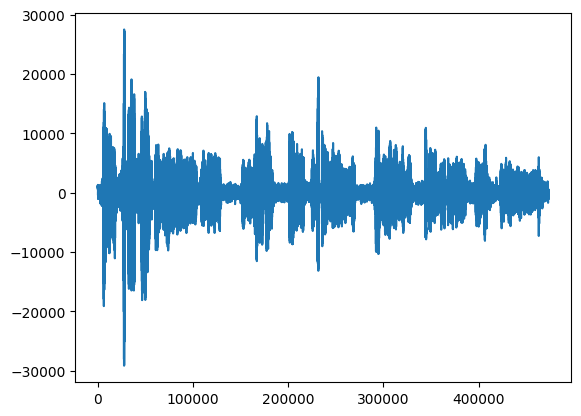

In [6]:
show_sample(suitcase[13])

In [8]:
# rerun the google transcribe on the audio
audio = suitcase[13][1]
segments = google_transcribe_from_array(audio, force_long_model=True)
predicted = ' '.join(result.alternatives[0].transcript for result in segments.results)
print(f"Predicted: {predicted}")
print(f"Reference: {suitcase[13][3]}")
error = wer(suitcase[13][3], predicted)
print(f"Error: {error}")

Predicted: so there is some big city with big buildings and a man and woman or walking past each other carrying identical luggage  and they hit each other fall down  apologize to each other and take their own respective luggages and start walking  they reach home only to realize that they actually  took the other person's luggage the man starts seeing the woman's clothes in this suitcase and the woman starts seeing the man's clothes
Reference: so there is some big city with big buildings and a man and a woman are walking past each other carrying identical luggage and they hit each other fall down fall next to each other and take their own respective luggages and start walking they reach home only to realize that they actually took the other person's luggage the man starts seeing the woman's clothes in the suitcase and the woman starts seeing the man's clothes
Error: 0.06756756756756757


In [9]:
# this one only works with the long model for some reason, update the google result
results.at[13, 'text_google'] = predicted
results.at[13, 'wer_google'] = error
results.to_csv(RESULT_CSV, index=False)

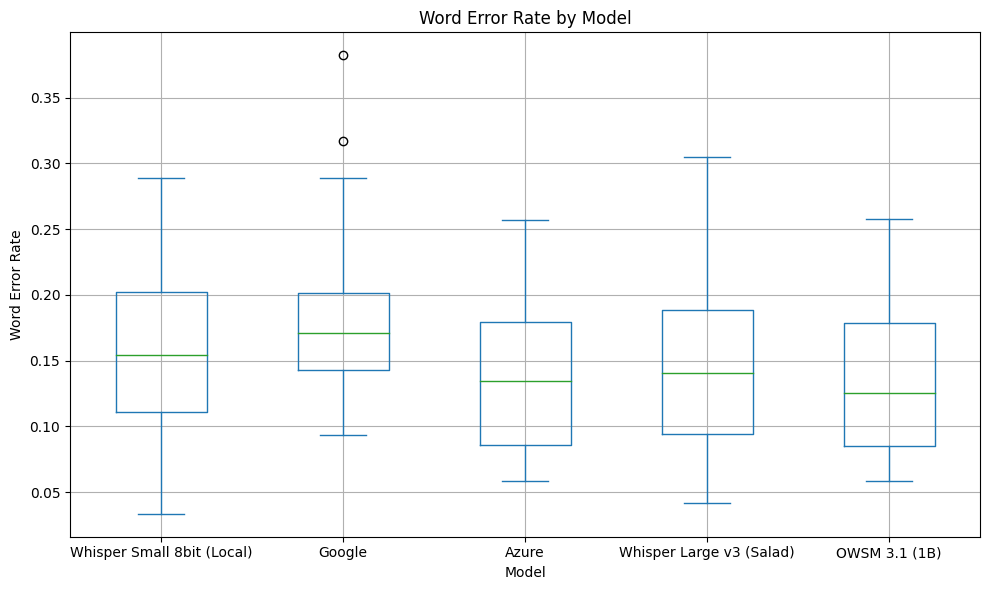

In [7]:
# plot wer by model
fig, ax = plt.subplots(figsize=(10, 6))
results[['wer_whisper', 'wer_google', 'wer_azure', 'wer_salad', 'wer_owsm']].plot(kind='box', ax=ax)
plt.xticks([1, 2, 3, 4, 5], ['Whisper Small 8bit (Local)', 'Google', 'Azure', 'Whisper Large v3 (Salad)', 'OWSM 3.1 (1B)'])
plt.title('Word Error Rate by Model')
plt.ylabel('Word Error Rate')
plt.xlabel('Model')
plt.grid()
plt.tight_layout()
plt.show()

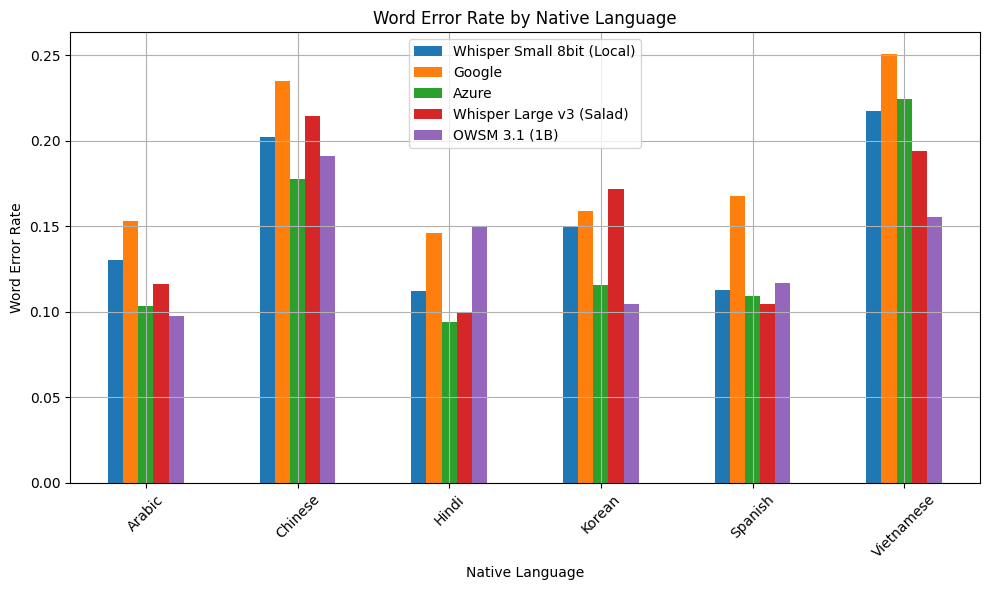

In [8]:
# plot wer by native language
fig, ax = plt.subplots(figsize=(10, 6))
grouped = results.groupby('native_language')[['wer_whisper', 'wer_google', 'wer_azure', 'wer_salad', 'wer_owsm']].mean()
grouped.plot(kind='bar', ax=ax)
plt.xticks(rotation=45)
plt.legend(['Whisper Small 8bit (Local)', 'Google', 'Azure', 'Whisper Large v3 (Salad)', 'OWSM 3.1 (1B)'])
plt.title('Word Error Rate by Native Language')
plt.ylabel('Word Error Rate')
plt.xlabel('Native Language')
plt.grid()
plt.tight_layout()
plt.show()